## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, min_samples_leaf = 2)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.03550457 0.         0.64741554 0.31707989]


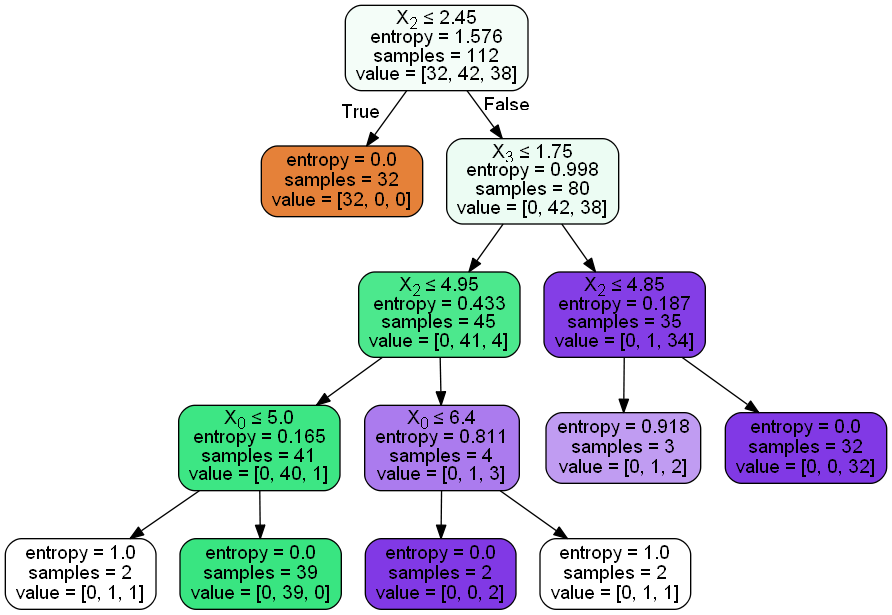

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\')